In [1]:
import json
from transformers import AutoTokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

import spacy
nlp = spacy.load('en_core_web_sm')

/home/xannadoo/miniconda3/envs/cntf/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = AutoTokenizer.from_pretrained('allenai/OLMo-1B-hf')

In [3]:
temp = [json.loads(x) for x in open('../data/outputs/large_10000_intgrads.json')]

for item in temp:
    for k, v in item.items():
        cols = v.keys()
        break
    break

df = pd.DataFrame(columns=cols)

for item in temp:
    for k, v in item.items():
        for ke, va in v.items():
            df.loc[k, ke] = va

In [4]:
df['start'] = df.apply(lambda x: tokenizer.tokenize(x['prompt']).index('ĠQuestion'), axis=1)
df['end'] = df.apply(lambda x: tokenizer.tokenize(x['prompt']).index('ĠAnswer') if 'ĠAnswer' in tokenizer.tokenize(x['prompt']) else tokenizer.tokenize(x['prompt']).index('Answer'), axis=1)

df['start2'] = df.apply(lambda x: tokenizer.tokenize(x['prompt2']).index('ĠQuestion'), axis=1)
df['end2'] = df.apply(lambda x: tokenizer.tokenize(x['prompt2']).index('ĠAnswer') if 'ĠAnswer' in tokenizer.tokenize(x['prompt2']) else tokenizer.tokenize(x['prompt2']).index('Answer'), axis=1)

df['question1'] = df.apply(lambda x: tokenizer.tokenize(x['prompt'])[x['start']+2:x['end']], axis=1)
df['question2'] = df.apply(lambda x: tokenizer.tokenize(x['prompt2'])[x['start2']+2:x['end2']], axis=1)

df['ig1'] = df.apply(lambda x: x['igs'][x['start']+2:x['end']], axis=1)
df['ig2'] = df.apply(lambda x: x['igs2'][x['start2']+2:x['end2']], axis=1)

df.reset_index(inplace=True)

print(df.shape)

df.columns = ['uid', 'prompt', 'answer', 'igs', 'prompt2', 'answer2', 'igs2',
       'start', 'end', 'start2', 'end2', 'question1', 'question2', 'ig1',
       'ig2']

df.head()

(1271, 15)


,uid,prompt,answer,igs,prompt2,answer2,igs2,start,end,start2,end2,question1,question2,ig1,ig2
0,2wiki-82306e0e088111ebbd6dac1f6bf848b6,Context: Ainhoa Artolazábal Royo( born 6 March...,Allen Holden,"[35.87395021902455, 23.465330539158817, 6.7703...",Context: Ainhoa Artolazábal Royo( born 6 March...,Ainhoa Artolazábal,"[10.603732116945983, -6.262902044518329, 1.901...",76,96,76,96,"[ĠWho, Ġwas, Ġborn, Ġearlier, ,, ĠAllen, ĠHold...","[ĠWho, Ġwas, Ġborn, Ġlater, ,, ĠAllen, ĠHold, ...","[-1.28132438441402, -1.2272578413919695, -0.46...","[-1.5612382386610975, -0.4434300525772401, 2.5..."
1,2wiki-6587a07d08b011ebbd84ac1f6bf848b6,Context: Richard Goodenough Rice (19 March 188...,Roxanne Quimby,"[-120.98487526015242, -15.333145514454815, -2....",Context: Richard Goodenough Rice (19 March 188...,Richard Rice,"[0.13634272541639766, -1.364552148725658, 0.03...",77,98,77,98,"[ĠWho, Ġwas, Ġborn, Ġlater, ,, ĠRichard, ĠRice...","[ĠWho, Ġwas, Ġborn, Ġearlier, ,, ĠRichard, ĠRi...","[0.7108289605742977, 1.2335776016338125, 0.531...","[0.6770447577578674, 0.048585180926233346, -0...."
2,2wiki-d9c376f108c911ebbd92ac1f6bf848b6,Context: Rüdiger Haas( born 15 December 1969) ...,Rüdiger Haas,"[-16.71479274144584, -5.316925872331186, -8.59...",Context: Rüdiger Haas( born 15 December 1969) ...,Denise Pesántes,"[-13.086132140642654, -8.004897729713623, -5.9...",60,81,60,81,"[ĠWho, Ġwas, Ġborn, Ġearlier, ,, ĠDen, ise, ĠP...","[ĠWho, Ġwas, Ġborn, Ġlater, ,, ĠDen, ise, ĠPes...","[2.0514022900338786, 1.0778464262756051, 2.278...","[0.4601275738648636, 0.7643839647789485, 1.897..."
3,2wiki-40f69ffc089611ebbd76ac1f6bf848b6,Context: Geoff Greetham( born 5 June 1962) is ...,Geoff Greetham,"[609.1165329524221, 1179.3708010136136, 23.047...",Context: Geoff Greetham( born 5 June 1962) is ...,Stefanos Kotsolis,"[1697.7214411387674, 3348.8697304015795, 87.34...",57,73,57,73,"[ĠWas, ĠGeoff, ĠGre, eth, am, Ġor, ĠStefan, os...","[ĠWas, ĠGeoff, ĠGre, eth, am, Ġor, ĠStefan, os...","[-0.7985527352242229, 1.6835177419189737, 0.23...","[1.1096636564472893, 3.147868246874579, 36.093..."
4,2wiki-86b400db092111ebbdaeac1f6bf848b6,Context: The Robbers is a 1962 Spanish crime f...,The Commandment Of Love,"[-13.987286745210884, -4.9330637152767585, -1....",Context: The Robbers is a 1962 Spanish crime f...,The Robbers (Film,"[18.215071287946426, -3.6048801685765524, 0.09...",56,77,56,77,"[ĠWhich, Ġfilm, Ġcame, Ġout, Ġfirst, ,, ĠThe, ...","[ĠWhich, Ġfilm, Ġcame, Ġout, Ġlast, ,, ĠThe, Ġ...","[0.4089109224663741, 0.1651113309760333, -0.22...","[-0.29480713498004, -0.2356233044984497, 1.728..."


## partitions

the positive partition consists of the question token(s) expressing the comparison operation (e.g. ‘more recently’). 

The negative partition consists of question tokens that are not in the set of entities or values that need to be compared, or in the set of verbs (which could capture the relation between the entities and their values).

### example

Which film came out  more recently , Blind Shaft or The Mask Of Fu  Manchu ?

positive: more recently

negative: which film or ?

In [5]:
comparitors = ['first', 'last', 'earlier', 'later', 'younger','older','more']
n = 0

Q = df.iloc[n]['question1']
Q2 = df.iloc[n]['question2']

ig = df.iloc[n]['ig1']
ig2 = df.iloc[n]['ig2']

def get_comp_idx(df, n):
    Q = df.iloc[n]['question1']
    Q2 = df.iloc[n]['question2']
    idx1 = []
    idx2 = []

    for comp in comparitors:
        for i, token in enumerate(Q):
            if 'Ġ' + comp in token:
                idx1.append(i)
                if comp == 'more':
                    idx1.append(i+1)
        for i, token in enumerate(Q2):
            if 'Ġ' + comp in token:
                idx2.append(i)
                if comp == 'more':
                    idx2.append(i+1)
    return idx1, idx2

def get_ent_idx(df, n):
    Q = df.iloc[n]['question1']
    Q2 = df.iloc[n]['question2']
    gold1 = tokenizer.tokenize(' ' + df.iloc[n]['answer'])
    gold2 = tokenizer.tokenize(' ' + df.iloc[n]['answer2'])
    return([Q.index(x) for x in gold1 + gold2], [Q2.index(x) for x in gold1 + gold2])

def get_partition(df, n):
    Q = df.iloc[n]['question1']
    Q2 = df.iloc[n]['question2']
    ents1, ents2 = get_ent_idx(df, n)
    pos1, pos2 = get_comp_idx(df, n)
    neg1 = [i for i in range(len(Q)) if i not in pos1 and i not in ents1]
    neg2 = [i for i in range(len(Q2)) if i not in pos2 and i not in ents2]
    return pos1, pos2, neg1, neg2

def get_scores(df, n):
    pos1, pos2, neg1, neg2 = get_partition(df, n)
    ig1 = df.iloc[n]['ig1']
    ig2 = df.iloc[n]['ig2']
    return np.mean([ig1[i] for i in pos1]), np.mean([ig1[i] for i in neg1]), np.mean([ig2[i] for i in pos2]), np.mean([ig2[i] for i in neg2])



get_scores(df, n)

(np.float64(-1.5181613600944184),
 np.float64(-0.9643614621529378),
 np.float64(0.15423767660892274),
 np.float64(-3.726262461778285))

In [6]:
comparitors = ['first', 'last', 'earlier', 'later', 'younger','older','more']

def get_comp_idx(row):
    Q = row['question1']
    Q2 = row['question2']
    idx1 = []
    idx2 = []

    for comp in comparitors:
        for i, token in enumerate(Q):
            if 'Ġ' + comp in token:
                idx1.append(i)
                if comp == 'more':
                    idx1.append(i+1)
        for i, token in enumerate(Q2):
            if 'Ġ' + comp in token:
                idx2.append(i)
                if comp == 'more':
                    idx2.append(i+1)
    return idx1, idx2

def get_ent_idx(row):
    Q = row['question1']
    Q2 = row['question2']
    gold1 = tokenizer.tokenize(' ' + row['answer'])
    gold2 = tokenizer.tokenize(' ' + row['answer2'])
    return([Q.index(x) for x in gold1 + gold2 if x in Q], [Q2.index(x) for x in gold1 + gold2 if x in Q2])

def get_partition(row):
    Q = row['question1']
    Q2 = row['question2']
    ents1, ents2 = get_ent_idx(row)
    pos1, pos2 = get_comp_idx(row)
    neg1 = [i for i in range(len(Q)) if i not in pos1 and i not in ents1]
    neg2 = [i for i in range(len(Q2)) if i not in pos2 and i not in ents2]
    return pos1, pos2, neg1, neg2

def get_scores(row):
    pos1, pos2, neg1, neg2 = get_partition(row)
    ig1 = row['ig1']
    ig2 = row['ig2']
    return np.mean([ig1[i] for i in pos1]), np.mean([ig1[i] for i in neg1]), np.mean([ig2[i] for i in pos2]), np.mean([ig2[i] for i in neg2])

def get_random(row):
    pos1, pos2, neg1, neg2 = get_partition(row)
    ig1 = row['ig1']
    ig2 = row['ig2']

    part1 = np.random.choice(ig1, len(pos1)+len(neg1), replace=False)
    part2 = np.random.choice(ig2, len(pos2)+len(neg2), replace=False)
    return np.mean(part1[:len(pos1)]), np.mean(part1[len(pos1):]), np.mean(part2[:len(pos2)]), np.mean(part2[len(pos2):])

    
np.random.seed(23) #make replicable
# Apply the get_scores function to each row in the DataFrame
df[['pos1_mean', 'neg1_mean', 'pos2_mean', 'neg2_mean']] = df.apply(get_scores, axis=1, result_type='expand')

df[['pos1_rand', 'neg1_rand', 'pos2_rand', 'neg2_rand']] = df.apply(get_random, axis=1, result_type='expand')


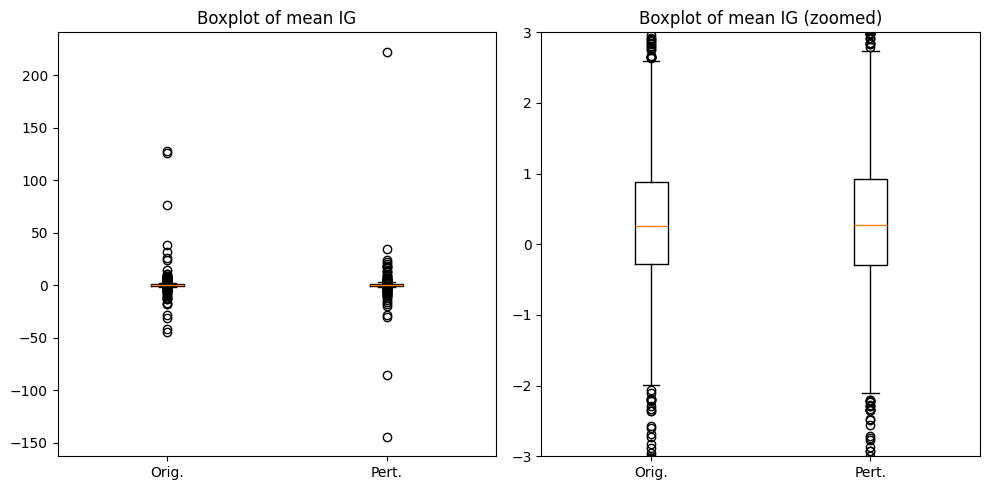

In [7]:
means = df.ig1.apply(lambda x: np.mean(x))
means2 = df.ig2.apply(lambda x: np.mean(x))

_, ax = plt.subplots(1,2, figsize=(10,5))

for i in range(2):
    ax[i].boxplot([means, means2])
    ax[i].set_xticklabels(['Orig.', 'Pert.'])
    ax[i].set_xticks([1, 2])

ax[1].set_ylim(-3, 3)
ax[0].set_title('Boxplot of mean IG')
ax[1].set_title('Boxplot of mean IG (zoomed)')

plt.tight_layout()

In [8]:
samp = df.iloc[np.argmin(means2)]

list(zip(samp['question2'], samp['ig2'])), list(zip(samp['question1'], samp['ig1']))

([('ĠWas', 6.3480940588486305),
  ('ĠEvan', -77.89996990393409),
  ('ĠJ', -381.9627861983898),
  ('ol', 13.618785785285457),
  ('itz', 2.9228934821148043),
  ('Ġor', -45.41467741989288),
  ('ĠT', -234.87242043998964),
  ('omas', -12.70875817099088),
  ('z', -236.1704299002737),
  ('ĠK', -1081.4973982149286),
  ('af', -15.150226307997707),
  ('ars', -26.958704577549618),
  ('ki', -172.54201062675799),
  ('Ġborn', -36.513710207823905),
  ('Ġlast', 2.547112437890137),
  ('?', -16.110109331436835)],
 [('ĠWas', -0.173369846396285),
  ('ĠEvan', 12.121167181746433),
  ('ĠJ', 6.055901100698936),
  ('ol', 4.54447662472512),
  ('itz', 1.4975264577996772),
  ('Ġor', -0.7580240237611521),
  ('ĠT', -0.7993214824889279),
  ('omas', -1.2515966863361068),
  ('z', 1.8392395654514786),
  ('ĠK', 0.5886239335625205),
  ('af', 0.45492363447092055),
  ('ars', -2.2345795261022885),
  ('ki', -1.5558466683244512),
  ('Ġborn', -2.73101905113956),
  ('Ġfirst', 0.20930459696403192),
  ('?', -0.07670208135256051)]

In [9]:
temp = df[['uid', 'pos1_mean', 'neg1_mean', 'pos2_mean', 'neg2_mean', 'pos1_rand', 'neg1_rand', 'pos2_rand', 'neg2_rand']].copy()

In [10]:
print(temp.shape)
temp.dropna(inplace=True) #sanity check, the small model resulted in a number of NaN.
print(temp.shape)

(1271, 9)
(1271, 9)


In [11]:
temp.describe()

,pos1_mean,neg1_mean,pos2_mean,neg2_mean,pos1_rand,neg1_rand,pos2_rand,neg2_rand
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,0.978555,-0.224453,-0.066142,-0.102181,0.362014,0.947988,0.553070,0.436050
std,22.969032,4.287368,5.924981,7.281881,6.402347,16.723218,6.306598,10.889651
min,-113.007888,-77.654603,-108.757996,-106.075338,-55.692097,-69.542508,-36.513710,-130.625282
25%,-0.753310,-0.939964,-1.091921,-0.794893,-0.713542,-0.408763,-0.705514,-0.417744
50%,0.105993,-0.143152,-0.039293,-0.109985,0.174756,0.265803,0.172784,0.227175
75%,0.889474,0.563555,0.879221,0.577955,1.158543,0.964813,1.277801,0.975826
max,657.421179,77.588383,118.701221,216.139900,125.109295,428.314821,178.941781,319.117374


In [12]:
for i in [1,2]:
    print(f"{i}\nPositive>Negative: {sum(temp[f'pos{i}_mean']>temp[f'neg{i}_mean'])}\nNegative>Positive: {sum(temp[f'pos{i}_mean']<temp[f'neg{i}_mean'])}\n")
    print(f"Random Positive>Negative: {sum(temp[f'pos{i}_rand']>temp[f'neg{i}_rand'])}\nRandom Negative>Positive: {sum(temp[f'pos{i}_rand']<temp[f'neg{i}_rand'])}\n")


1
Positive>Negative: 726
Negative>Positive: 545

Random Positive>Negative: 629
Random Negative>Positive: 642

2
Positive>Negative: 652
Negative>Positive: 619

Random Positive>Negative: 629
Random Negative>Positive: 642



In [13]:
temp['diff1']  = temp.pos1_mean - temp.neg1_mean
temp['diff1_rand']  = temp.pos1_rand - temp.neg1_rand
temp['diff2']  = temp.pos2_mean - temp.neg2_mean
temp['diff2_rand']  = temp.pos2_rand - temp.neg2_rand

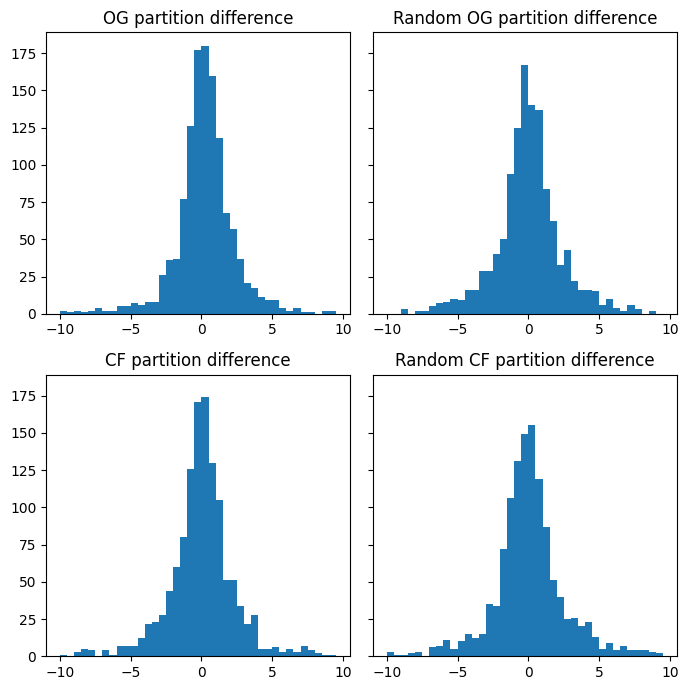

In [14]:
bins = np.arange(-10, 10, 0.5)
_, ax = plt.subplots(2,2, figsize=(7,7), sharey=True)
ax = ax.flatten()

ax[0].hist(temp['diff1'], bins=bins)
ax[0].set_title('OG partition difference')
ax[1].hist(temp['diff1_rand'], bins=bins)
ax[1].set_title('Random OG partition difference')
ax[2].hist(temp['diff2'], bins=bins)
ax[2].set_title('CF partition difference')
ax[3].hist(temp['diff2_rand'], bins=bins)
ax[3].set_title('Random CF partition difference')

plt.tight_layout()

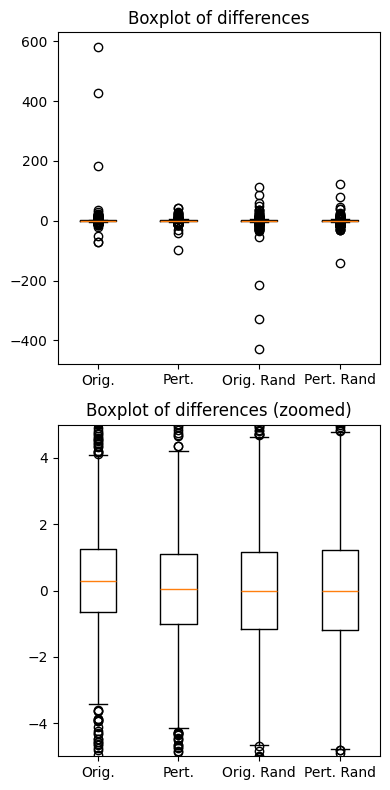

In [15]:
_, ax = plt.subplots(2,1, figsize=(4,8))

for i in range(2):
    ax[i].boxplot(temp[['diff1',  'diff2', 'diff1_rand','diff2_rand']])
    ax[i].set_xticklabels(['Orig.', 'Pert.', 'Orig. Rand', 'Pert. Rand'])
    ax[i].set_xticks([1, 2, 3, 4])

ax[1].set_ylim(-5, 5)
ax[0].set_title('Boxplot of differences')
ax[1].set_title('Boxplot of differences (zoomed)')

plt.tight_layout()
plt.savefig('../images/boxplot_diffs.png')

In [16]:
def t_stat(df,i):
    sample_mean = df[f'diff{i}'].mean()
    population_mean = df[f'diff{i}_rand'].mean()
    sample_std = df[f'diff{i}'].std(ddof=1)

    return (sample_mean - population_mean) / (sample_std / np.sqrt(len(df)))

def one_tailed(t_stat, deg_free):
    return 1 - t.cdf(t_stat, deg_free)

for i in [1,2]:
    tsta = t_stat(temp, i)
    print(f"{i}: t-stat: {tsta:.3f}, p-val: {one_tailed(tsta, len(temp)-1):.3f}")
    print(f'')
        

1: t-stat: 2.989, p-val: 0.001

2: t-stat: -0.608, p-val: 0.728



In [17]:
temp.describe()

,pos1_mean,neg1_mean,pos2_mean,neg2_mean,pos1_rand,neg1_rand,pos2_rand,neg2_rand,diff1,diff1_rand,diff2,diff2_rand
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,0.978555,-0.224453,-0.066142,-0.102181,0.362014,0.947988,0.553070,0.436050,1.203008,-0.585974,0.036038,0.117020
std,22.969032,4.287368,5.924981,7.281881,6.402347,16.723218,6.306598,10.889651,21.338179,17.594300,4.748108,7.346091
min,-113.007888,-77.654603,-108.757996,-106.075338,-55.692097,-69.542508,-36.513710,-130.625282,-72.311341,-428.008415,-97.438678,-140.175593
25%,-0.753310,-0.939964,-1.091921,-0.794893,-0.713542,-0.408763,-0.705514,-0.417744,-0.661710,-1.168744,-1.024028,-1.191778
50%,0.105993,-0.143152,-0.039293,-0.109985,0.174756,0.265803,0.172784,0.227175,0.274080,-0.013416,0.047666,-0.022059
75%,0.889474,0.563555,0.879221,0.577955,1.158543,0.964813,1.277801,0.975826,1.241376,1.169027,1.110592,1.209172
max,657.421179,77.588383,118.701221,216.139900,125.109295,428.314821,178.941781,319.117374,579.832796,113.033784,42.042177,123.455409


In [18]:
temp['og_sig'] = temp.diff1.apply(lambda x: one_tailed((x - temp[f'diff1_rand'].mean()) / (temp[f'diff1'].std(ddof=1)/np.sqrt(len(temp))), len(temp)-1))
temp['cf_sig'] = temp.diff2.apply(lambda x: one_tailed((x - temp[f'diff2_rand'].mean()) / (temp[f'diff2'].std(ddof=1)/np.sqrt(len(temp))), len(temp)-1))

temp['randog_sig'] = temp.diff1_rand.apply(lambda x: one_tailed((x - temp[f'diff1_rand'].mean()) / (temp[f'diff1'].std(ddof=1)/np.sqrt(len(temp))), len(temp)-1))
temp['randcf_sig'] = temp.diff2_rand.apply(lambda x: one_tailed((x - temp[f'diff2_rand'].mean()) / (temp[f'diff2'].std(ddof=1)/np.sqrt(len(temp))), len(temp)-1))

temp

,uid,pos1_mean,neg1_mean,pos2_mean,neg2_mean,pos1_rand,neg1_rand,pos2_rand,neg2_rand,diff1,diff1_rand,diff2,diff2_rand,og_sig,cf_sig,randog_sig,randcf_sig
0,2wiki-82306e0e088111ebbd6dac1f6bf848b6,-1.518161,-0.964361,0.154238,-3.726262,-1.281324,-0.462204,0.280960,-1.629268,-0.553800,-0.819120,3.880500,1.910229,4.785696e-01,0.000000,6.515266e-01,0.000000e+00
1,2wiki-6587a07d08b011ebbd84ac1f6bf848b6,0.535837,-1.429348,0.043628,-0.072785,0.504211,-2.323304,-0.066142,-0.118482,1.965186,2.827515,0.116413,0.052340,1.086038e-05,0.501819,7.308171e-09,6.863511e-01
2,2wiki-d9c376f108c911ebbd92ac1f6bf848b6,3.996732,-0.566442,2.131437,-0.181178,-11.599642,0.260769,-0.236397,0.457431,4.563175,-11.860411,2.312615,-0.693827,0.000000e+00,0.000000,1.000000e+00,1.000000e+00
3,2wiki-40f69ffc089611ebbd76ac1f6bf848b6,0.511701,-0.291626,1.062058,-1.047172,1.369193,0.348856,2.032944,-1.990021,0.803328,1.020338,2.109231,4.022965,1.021695e-02,0.000000,3.687185e-03,0.000000e+00
4,2wiki-86b400db092111ebbdaeac1f6bf848b6,0.143125,0.042040,0.354669,-0.153040,0.229338,-0.121385,-0.390540,0.147142,0.101085,0.350723,0.507709,-0.537681,1.256103e-01,0.001706,5.891594e-02,9.999995e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,2wiki-92ee7f7b085811ebbd5aac1f6bf848b6,-1.182363,-1.048205,-0.931270,0.902239,-1.614338,-5.804177,1.743467,2.469796,-0.134157,4.189839,-1.833509,-0.726329,2.252308e-01,1.000000,1.665335e-15,1.000000e+00
1267,2wiki-e1b07d1d098011ebbdb0ac1f6bf848b6,-0.315368,1.517239,1.347776,4.100078,0.201621,1.931785,9.462219,3.476195,-1.832608,-1.730164,-2.752302,5.986024,9.812669e-01,1.000000,9.719286e-01,0.000000e+00
1268,2wiki-504a193b08f411ebbdaaac1f6bf848b6,0.011219,1.409344,1.258496,-1.733787,1.589107,1.465437,1.258496,0.352028,-1.398125,0.123670,2.992283,0.906468,9.124751e-01,0.000000,1.179915e-01,1.978226e-09
1269,2wiki-c0cdfaad089a11ebbd77ac1f6bf848b6,0.053469,-0.959949,2.380687,0.185803,-2.230021,-0.448876,1.367719,0.419577,1.013417,-1.781145,2.194883,0.948142,3.815931e-03,0.000000,9.769728e-01,2.966762e-10


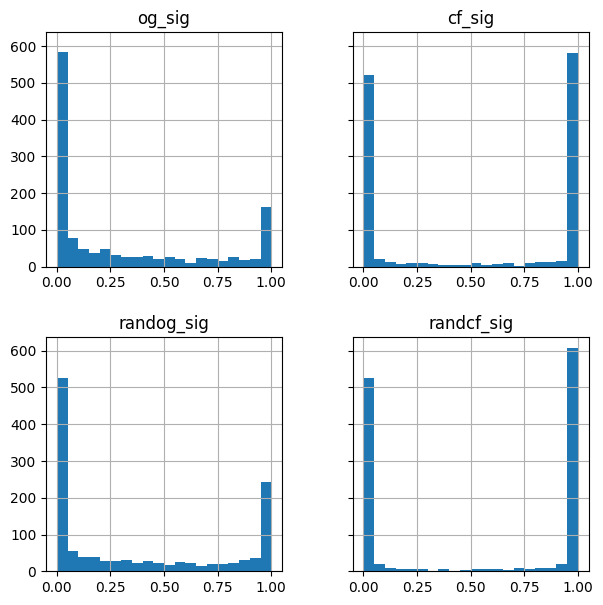

In [19]:
_, ax = plt.subplots(2,2, figsize=(7,7), sharey=True)
temp.hist('og_sig', bins=20, ax=ax[0,0])
temp.hist('cf_sig', bins=20, ax=ax[0,1])
temp.hist('randog_sig', bins=20, ax=ax[1,0])
temp.hist('randcf_sig', bins=20, ax=ax[1,1]);

In [20]:
temp[temp.diff1 > 0]['og_sig'].describe()

count    726.000000
mean       0.025173
std        0.040705
min        0.000000
25%        0.000003
50%        0.002526
75%        0.034142
max        0.163859
Name: og_sig, dtype: float64

In [21]:
sum([True  if x < 0.05 else False for x in temp['og_sig']]), sum([True  if x < 0.05 else False for x in temp['cf_sig']]), sum([True  if x < 0.05 else False for x in temp['randog_sig']]), sum([True  if x < 0.05 else False for x in temp['randcf_sig']])

(584, 522, 526, 525)

In [22]:
from scipy.stats import false_discovery_control

corrected = false_discovery_control(temp['og_sig'], method='bh')
corrected2 = false_discovery_control(temp['cf_sig'], method='bh')

correctedrand = false_discovery_control(temp['randog_sig'], method='bh')
correctedrand2 = false_discovery_control(temp['randcf_sig'], method='bh')

temp['og_corrected'] = corrected
temp['cf_corrected'] = corrected2
temp['randog_corrected'] = correctedrand
temp['randcf_corrected'] = correctedrand2

print(f"OG: {sum([True  if x < 0.05 else False for x in temp['og_sig']])/temp.shape[0]:.1%}\nCF: {sum([True  if x < 0.05 else False for x in temp['cf_sig']])/temp.shape[0]:.1%}\nRandom OG: {sum([True  if x < 0.05 else False for x in temp['randog_sig']])/temp.shape[0]:.1%}\nRandom CF: {sum([True  if x < 0.05 else False for x in temp['randcf_sig']])/temp.shape[0]:.1%}\n")
print(f"OG: {sum([True  if x < 0.05 else False for x in corrected])/temp.shape[0]:.1%}\nCF: {sum([True  if x < 0.05 else False for x in corrected2])/temp.shape[0]:.1%}\nRandom OG: {sum([True  if x < 0.05 else False for x in correctedrand])/temp.shape[0]:.1%}\nRandom CF: {sum([True  if x < 0.05 else False for x in correctedrand2])/temp.shape[0]:.1%}")

OG: 45.9%
CF: 41.1%
Random OG: 41.4%
Random CF: 41.3%

OG: 38.9%
CF: 39.9%
Random OG: 33.7%
Random CF: 39.9%


In [23]:
print(f"OG: {sum([True  if x < 0.05 else False for x in corrected])}\nCF: {sum([True  if x < 0.05 else False for x in corrected2])}\nRandom OG: {sum([True  if x < 0.05 else False for x in correctedrand])}\nRandom CF: {sum([True  if x < 0.05 else False for x in correctedrand2])}")

OG: 495
CF: 507
Random OG: 428
Random CF: 507


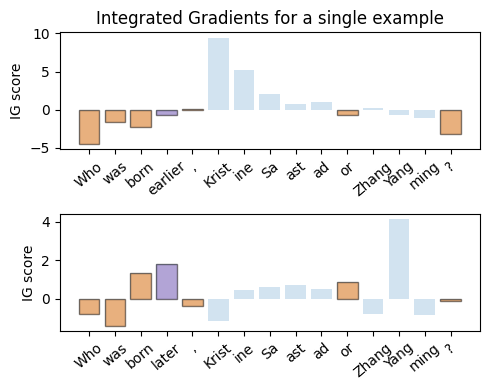

In [24]:
n=1238
lenth = len(df.iloc[n]['question1'])
p1, p2, n1, n2 = get_partition(df.iloc[n])

_, ax = plt.subplots(2,1, figsize=(5,4))

ax[0].bar([x for x in range(lenth)], df.iloc[n]['ig1'], alpha=0.2)
ax[1].bar([x for x in range(lenth)], df.iloc[n]['ig2'], alpha=0.2)

ax[0].bar(p1, [df.iloc[n]['ig1'][i] for i in p1], color='tab:purple', label='positive partition', alpha=0.5, edgecolor='black')
ax[0].bar(n1, [df.iloc[n]['ig1'][i] for i in n1], color='tab:orange', label='negative partition', alpha=0.5, edgecolor='black')

ax[1].bar(p2, [df.iloc[n]['ig2'][i] for i in p2], color='tab:purple', label='positive partition', alpha=0.5, edgecolor='black')
ax[1].bar(n2, [df.iloc[n]['ig2'][i] for i in n2], color='tab:orange', label='negative partition', alpha=0.5, edgecolor='black')

ax[0].set_xticks([x for x in range(lenth)])
ax[1].set_xticks([x for x in range(lenth)])

ax[0].set_xticklabels([x.strip('Ġ') for x in df.iloc[n]['question1']], rotation=40)
ax[1].set_xticklabels([x.strip('Ġ') for x in df.iloc[n]['question2']], rotation=40)

#ax[0].legend()
#ax[1].legend()

ax[0].set_title('Integrated Gradients for a single example')
ax[0].set_ylabel('IG score')
ax[1].set_ylabel('IG score')
plt.tight_layout()
plt.savefig('../images/partition_example.png');

In [25]:
df.iloc[n]

uid                     2wiki-fe76f69408ed11ebbda8ac1f6bf848b6
prompt       Context: Zhang Yangming( born 31 August 1994) ...
answer                                        Kristine Saastad
igs          [3.6199537852631245, -0.45413894881488126, -2....
prompt2      Context: Zhang Yangming( born 31 August 1994) ...
answer2                                         Zhang Yangming
igs2         [1.9269725453177675, 4.660344584063193, 5.6304...
start                                                       58
end                                                         75
start2                                                      58
end2                                                        75
question1    [ĠWho, Ġwas, Ġborn, Ġearlier, ,, ĠKrist, ine, ...
question2    [ĠWho, Ġwas, Ġborn, Ġlater, ,, ĠKrist, ine, ĠS...
ig1          [-4.556884481163454, -1.5987849756708823, -2.3...
ig2          [-0.7748625740807145, -1.400669924419524, 1.35...
pos1_mean                                            -0

In [27]:
cf = pd.read_csv('../data/responses.csv')

cf.columns = ['uid', 'gold_present', 'wrong_present', 'gold2_present',
       'wrong2_present', 'out', 'out2', 'order', 'question1', 'question2',
       'f11', 'f12', 'ac', 'ac2', 'judge', 'og_accuracy', 'cf_accuracy',
       'orig_comp', 'cf_comp']

print(cf.shape)

cf = temp.join(other=cf.set_index('uid'), on='uid', how='inner')

cf.shape, temp.shape #check we haven't lost any rows

(9677, 19)


((1271, 39), (1271, 21))

In [28]:
print(cf[cf.uid == '2wiki-fe76f69408ed11ebbda8ac1f6bf848b6'][['question1', 'out', 'question2', 'out2', 'diff1', 'diff2']])

print([x for x in cf[cf.uid == '2wiki-fe76f69408ed11ebbda8ac1f6bf848b6']['question1']])

                                              question1               out  \
1238  Who was born earlier, Kristine Saastad or Zhan...  Kristine Saastad   

                                              question2            out2  \
1238  Who was born later, Kristine Saastad or Zhang ...  Zhang Yangming   

         diff1     diff2  
1238  1.382091  1.897998  
['Who was born earlier, Kristine Saastad or Zhang Yangming?']


In [29]:
print(f'OG alignment: {cf[(cf.og_corrected < 0.05) & (cf.og_accuracy==1)].shape[0]/cf.shape[0]:.2%}')
print(f'CF alignment: {cf[(cf.cf_corrected < 0.05) & (cf.cf_accuracy==1)].shape[0]/cf.shape[0]:.2%}')

OG alignment: 33.28%
CF alignment: 23.60%


In [30]:
print(f'Overall alignment: {cf[(cf.og_corrected < 0.05) & (cf.cf_corrected < 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf.shape[0]:.2%}')

Overall alignment: 6.77%


In [31]:
#Only considering cases where the positive partiotion is greater than the negative partition
print(f'OG alignment: {cf[(cf.og_corrected < 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.og_corrected < 0.05)].shape[0]:.2%}')
print(f'CF alignment: {cf[(cf.cf_corrected < 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.cf_corrected < 0.05)].shape[0]:.2%}')
print(f'Overall alignment: {cf[(cf.og_corrected < 0.05) & (cf.cf_corrected < 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.og_corrected < 0.05) & (cf.cf_corrected < 0.05)].shape[0]:.2%}')

OG alignment: 45.45%
CF alignment: 47.14%
Overall alignment: 43.22%


In [32]:
print(f'OG alignment: {cf[(cf.og_corrected >= 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.og_corrected >= 0.05)].shape[0]:.2%}')
print(f'CF alignment: {cf[(cf.cf_corrected >= 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.cf_corrected >= 0.05)].shape[0]:.2%}')
print(f'Overall alignment: {cf[(cf.og_corrected >= 0.05) & (cf.cf_corrected >= 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.og_corrected >= 0.05) & (cf.cf_corrected >= 0.05)].shape[0]:.2%}')

OG alignment: 47.81%
CF alignment: 46.73%
Overall alignment: 46.58%


In [33]:
print(f'OG alignment: {cf[(cf.og_corrected < 0.05) & (cf.og_accuracy==1)].shape[0]/cf[(cf.og_corrected < 0.05)].shape[0]:.2%}')
print(f'CF alignment: {cf[(cf.cf_corrected < 0.05) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.cf_corrected < 0.05)].shape[0]:.2%}')
print(f'Overall alignment: {cf[(cf.og_corrected < 0.05) & (cf.cf_corrected < 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.og_corrected < 0.05) & (cf.cf_corrected < 0.05)].shape[0]:.2%}')

OG alignment: 85.45%
CF alignment: 59.17%
Overall alignment: 43.22%


In [34]:
print(f'OG alignment: {cf[(cf.og_corrected >= 0.05) & (cf.og_accuracy==1)].shape[0]/cf[(cf.og_corrected >= 0.05)].shape[0]:.2%}')
print(f'CF alignment: {cf[(cf.cf_corrected >= 0.05) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.cf_corrected >= 0.05)].shape[0]:.2%}')
print(f'Overall alignment: {cf[(cf.og_corrected >= 0.05) & (cf.cf_corrected >= 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf[(cf.og_corrected >= 0.05) & (cf.cf_corrected >= 0.05)].shape[0]:.2%}')

OG alignment: 82.73%
CF alignment: 56.41%
Overall alignment: 46.58%


In [35]:
print(f'OG: {cf[(cf.og_accuracy==1)].shape[0]/cf.shape[0]:.2%}')
print(f'CF: {cf[(cf.cf_accuracy==1)].shape[0]/cf.shape[0]:.2%}')
print(f'Overall: {cf[(cf.og_accuracy==1) & (cf.cf_accuracy==1)].shape[0]/cf.shape[0]:.2%}')

OG: 83.79%
CF: 57.51%
Overall: 46.89%


In [36]:
print(f'OG alignment: {cf[(cf.judge=="Correct") & (cf.og_corrected < 0.05)].shape[0]/cf[(cf.judge=="Correct")].shape[0]:.2%}')
print(f'CF alignment: {cf[(cf.cf_corrected < 0.05) & (cf.judge=="Correct")].shape[0]/cf[(cf.judge=="Correct")].shape[0]:.2%}')

OG alignment: 37.75%
CF alignment: 40.10%


In [37]:
cf[(cf.og_corrected < 0.05) & (cf.cf_corrected < 0.05) & (cf.og_accuracy==1) & (cf.cf_accuracy==1)][['out', 'out2', 'diff1', 'diff2']]

,out,out2,diff1,diff2
22,Berry Fleming,Qu Bo (Footballer),2.066760,1.226509
54,George Morton Pitt,Denis Sire,1.899019,1.181728
60,Grace Helen Mowat was born first. The,Giuseppe Colombo,5.280754,3.804389
66,Mariano Miño,João da Paula ( Age 82 as of June,1.460630,1.906559
68,Alberts Riekstiņš,Rini Coolen,1.410835,0.754587
...,...,...,...,...
1219,"Tang Deshang ( born April 2, 1991)",Arturo Porro (sports shooter) (,6.930656,1.118408
1224,Victor Jacquemin (born 12 March 1892),Stefano Ferrario ( born 28 March 1985,0.733084,4.361710
1238,Kristine Saastad,Zhang Yangming,1.382091,1.897998
1242,Seven Miles From Alcatraz,Vino Veritas,1.754091,0.684221
